In [15]:
#!/usr/bin/env python

# JRK: from https://breakingcode.wordpress.com/2013/04/08/finding-connected-components-in-a-graph/

# Finding connected components in a bidirectional graph.
# By Mario Vilas (mvilas at gmail dot com)

import random
import string
import time
import numpy as np

# The graph nodes.
class Data(object):
    def __init__(self, name):
        self.__name  = name
        self.__links = set()

    @property
    def name(self):
        return self.__name

    @property
    def links(self):
        return set(self.__links)

    def add_link(self, other):
        self.__links.add(other)
        other.__links.add(self)

# The function to look for connected components.
def connected_components(nodes):

    # List of connected components found. The order is random.
    result = []

    # Make a copy of the set, so we can modify it.
    nodes = set(nodes)

    # Iterate while we still have nodes to process.
    while nodes:

        # Get a random node and remove it from the global set.
        n = nodes.pop()

        # This set will contain the next group of nodes connected to each other.
        group = {n}

        # Build a queue with this node in it.
        queue = [n]

        # Iterate the queue.
        # When it's empty, we finished visiting a group of connected nodes.
        while queue:

            # Consume the next item from the queue.
            n = queue.pop(0)

            # Fetch the neighbors.
            neighbors = n.links

            # Remove the neighbors we already visited.
            neighbors.difference_update(group)

            # Remove the remaining nodes from the global set.
            nodes.difference_update(neighbors)

            # Add them to the group of connected nodes.
            group.update(neighbors)

            # Add them to the queue, so we visit them in the next iterations.
            queue.extend(neighbors)

        # Add the group to the list of groups.
        result.append(group)

    # Return the list of groups.
    return result

# The test code...
if __name__ == "__main__":
    
    n_nodes = 500
    times_generate = {}
    times_solve = {}
    
    while True:
        try:
            graph = []
            n_nodes = n_nodes + 500
            nodes = []
            name_length = 8
            # probabiliy = 1 / n_nodes
            
            for i in range(n_nodes):
                hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
                graph.append(Data(hash))
                
            start_time = time.time()
            for i in range(n_nodes):
                for link in random.sample(graph, random.randint(0, n_nodes)):
                    graph[i].add_link(link)
            stopped_time = time.time() - start_time
            
            print("Time to generate graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_generate[n_nodes] = stopped_time
        
            # Find all the connected components.
            number = 1
            start_time = time.time()
            for components in connected_components(graph):
                names = sorted(node.name for node in components)
                names = ", ".join(names)
                #print("Group #%i: %s" % (number, names))
                number += 1
            stopped_time = time.time() - start_time
            
            print("Time to solve graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_solve[n_nodes] = stopped_time
                
        except KeyboardInterrupt:
            break

Time to generate graph - nodes: 1000:0.9071259498596191 seconds
Time to solve graph - nodes: 1000:0.041613101959228516 seconds
Time to generate graph - nodes: 1500:2.2366039752960205 seconds
Time to solve graph - nodes: 1500:0.09363102912902832 seconds
Time to generate graph - nodes: 2000:3.9081850051879883 seconds
Time to solve graph - nodes: 2000:0.18606996536254883 seconds
Time to generate graph - nodes: 2500:6.146842956542969 seconds
Time to solve graph - nodes: 2500:0.25202083587646484 seconds
Time to generate graph - nodes: 3000:9.14967393875122 seconds
Time to solve graph - nodes: 3000:0.38900089263916016 seconds
Time to generate graph - nodes: 3500:12.336535930633545 seconds
Time to solve graph - nodes: 3500:0.49626898765563965 seconds
Time to generate graph - nodes: 4000:16.10498285293579 seconds
Time to solve graph - nodes: 4000:0.6112651824951172 seconds
Time to generate graph - nodes: 4500:21.34692406654358 seconds
Time to solve graph - nodes: 4500:0.880669116973877 seconds

In [16]:
print(times_generate)
print(times_solve)

{4000: 16.10498285293579, 6000: 38.81223678588867, 2500: 6.146842956542969, 7500: 66.11489605903625, 8500: 84.83513498306274, 5000: 26.662800788879395, 1500: 2.2366039752960205, 3500: 12.336535930633545, 8000: 71.80939483642578, 2000: 3.9081850051879883, 1000: 0.9071259498596191, 4500: 21.34692406654358, 7000: 55.81980299949646, 3000: 9.14967393875122, 6500: 48.24269890785217, 5500: 34.470104932785034}
{4000: 0.6112651824951172, 6000: 1.652324914932251, 2500: 0.25202083587646484, 7500: 4.210410833358765, 8500: 5.847959995269775, 5000: 0.9324350357055664, 1500: 0.09363102912902832, 3500: 0.49626898765563965, 8000: 2.9120230674743652, 2000: 0.18606996536254883, 1000: 0.041613101959228516, 4500: 0.880669116973877, 7000: 3.1557469367980957, 3000: 0.38900089263916016, 6500: 2.380173921585083, 5500: 1.29899001121521}


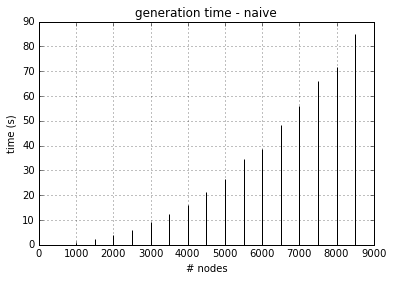

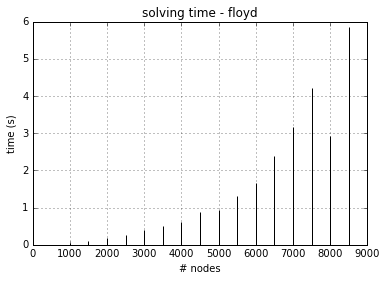

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times_generate.keys()), times_generate.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('generation time')
plt.grid(True)
plt.show()

plt.bar(list(times_solve.keys()), times_solve.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('solving time')
plt.grid(True)
plt.show()